In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('../artifacts/cardio_dataset.csv').values

In [3]:
data=dataset[:,0:7]
target=dataset[:,7]

In [4]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2,random_state=42)

In [6]:
train_data

array([[0.        , 0.12820513, 0.2760181 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.69230769, 0.75791855, ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.07692308, 0.35067873, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.53846154, 0.33257919, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.1025641 , 0.42081448, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.15384615, 0.35067873, ..., 0.        , 1.        ,
        0.        ]], shape=(5315, 7))

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=7, activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

C:\Users\Acer\Desktop\Heart-Disease-Risk-Level-Predictor\env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,941 (38.83 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_predict = self.model.predict(test_data)
        val_r2 = r2_score(test_target, val_predict)
        print(f"epoch {epoch} - r2 score: {val_r2}")

checkpoint = ModelCheckpoint('../models/best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

In [9]:
import tensorflow as tf
import random
import os

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
history=model.fit(train_data,train_target,epochs=200,batch_size=32,validation_data=(test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
epoch 0 - r2 score: 0.6436853614063123
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0125 - mae: 0.0749 - mse: 0.0125 - val_loss: 0.0085 - val_mae: 0.0550 - val_mse: 0.0085
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
epoch 1 - r2 score: 0.7122402814852307
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0072 - mae: 0.0558 - mse: 0.0072 - val_loss: 0.0068 - val_mae: 0.0479 - val_mse: 0.0068
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
epoch 2 - r2 score: 0.7873304158350466
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - mae: 0.0511 - mse: 0.0064 - val_loss: 0.0050 - val_mae: 0.0413 - val_mse: 0.0050
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
epoch 3 - r2 score: 0.7661932600938488
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0055 - mae: 0.0481 - mse: 0.0055 - val_loss: 0.0055 - val_mae: 0.0428 - val_mse: 0.0055
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
epoch 4 - r2 score: 0.7756654

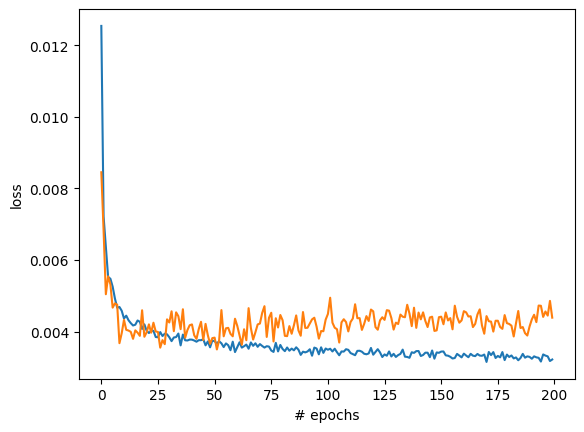

In [11]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [16]:
from keras.models import load_model
model = load_model('../models/best_model.keras')  # Use the checkpointed best model

In [22]:
# Get predictions on test data
predicted_result_scaled = model.predict(test_data)
predicted_result = scaler_target.inverse_transform(predicted_result_scaled)
test_target_actual = scaler_target.inverse_transform(test_target)

# Print first 10
print('actual:', test_target[:10].T)
print('predicted:', predicted_result_scaled[:10].T)
print('actual inverse scaled:', test_target_actual[:10].T)
print('predicted inverse scaled:', predicted_result[:10].T)

# ←←← THIS IS THE ONLY LINE YOU NEED TO ADD / FIX ←←←
from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score:", r2_score(test_target_actual, predicted_result))
print("MAE (actual units):", mean_absolute_error(test_target_actual, predicted_result))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
actual: [[0.05627198 0.00117233 0.02461899 0.03985932 0.44783118 0.01641266
  0.0961313  0.40797186 0.05041032 0.06213365]]
predicted: [[0.09205645 0.0128075  0.02941573 0.03390281 0.5640503  0.02846909
  0.12051673 0.1863389  0.04042191 0.05744077]]
actual inverse scaled: [[ 4.9  0.2  2.2  3.5 38.3  1.5  8.3 34.9  4.4  5.4]]
predicted inverse scaled: [[ 7.9524155  1.1924801  2.609162   2.9919097 48.21349    2.5284135
  10.380077  15.994708   3.5479891  4.999698 ]]
R2 Score: 0.8523494999359393
MAE (actual units): 3.0858382898672265


In [23]:
my_test_data=[0,70,250,20,1,1,1]

my_test_data = scaler_data.transform([my_test_data])

result=model.predict(my_test_data)
print('result:',result)

predicted = scaler_target.inverse_transform(result)

print('predicted result:',predicted)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
result: [[0.5460879]]
predicted result: [[46.681297]]


In [25]:
import joblib

joblib.dump(scaler_data,'../models/scaler_data.sav')
joblib.dump(scaler_target,'../models/scaler_target.sav')

['../models/scaler_target.sav']